<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/Xor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import tensorflow.keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from keras.utils.vis_utils import plot_model

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLdatasets/7.xor.csv",header=None)

In [3]:
data.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [4]:
data.shape

(500, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


No null values

In [6]:
data[2].value_counts()

-1.0    260
 1.0    240
Name: 2, dtype: int64

Slightly imbalanced data and output has -1 and 1

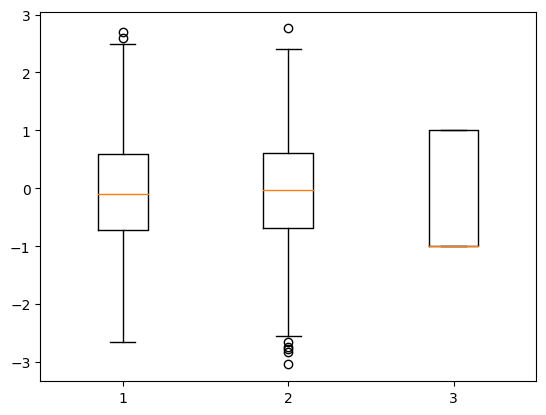

In [7]:
plt.boxplot(data)
plt.show()

Outliers in both column 1 and column2

In [8]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [9]:
find_outliers_IQR(data[0])

247    2.696224
449    2.594425
Name: 0, dtype: float64

In [10]:
find_outliers_IQR(data[1])

135   -2.772593
213   -2.739677
242   -2.655619
294   -3.046143
342   -2.834555
471    2.759355
Name: 1, dtype: float64

In [11]:
def cap_Outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    lowbound = q1 -(1.5*IQR)
    upbound = q3 +(1.5*IQR)
    df = df.apply(lambda x : lowbound if x < lowbound  else  upbound  if x > upbound else x)
    return df

In [12]:
data[0] = cap_Outliers(data[0])

In [13]:
data[1] = cap_Outliers(data[1])

In [14]:
find_outliers_IQR(data[1])

Series([], Name: 1, dtype: float64)

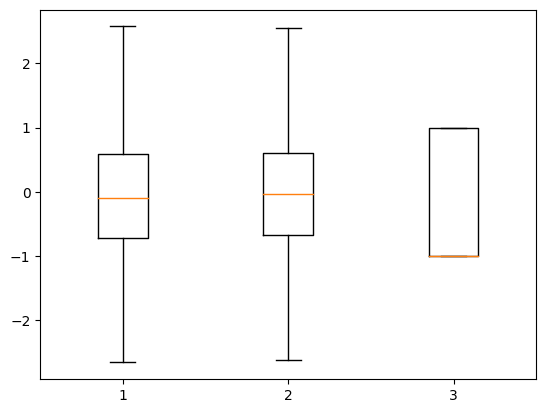

In [15]:
plt.boxplot(data)
plt.show()

Outliers have been capped

In [16]:
x = data[[0,1]]
y = data[2]

In [17]:
y = y.astype(int)

Output needs to be int for comparision with predicted output

> Indented block



In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [19]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((400, 2), (100, 2), 400, 100)

In [20]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [21]:
model=Sequential()
model.add(Dense(5,activation="tanh",input_dim=2))
model.add(Dense(3,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


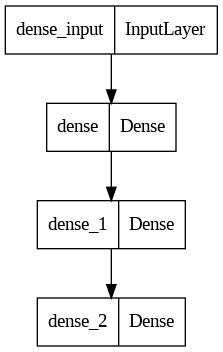

In [23]:
plot_model(model)

In [24]:
model.layers[0].get_weights()

[array([[-0.67807984,  0.30967724, -0.04373288,  0.45059586, -0.41929126],
        [-0.16995823,  0.47707093,  0.6235211 ,  0.9139198 , -0.36022544]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [25]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
history = model.fit(x_train,y_train,batch_size=1,epochs=20,validation_split=0.2)

Epoch 1/20
320/320 [==============================] - 2s 4ms/step - loss: 0.2835 - accuracy: 0.0312 - val_loss: 0.1239 - val_accuracy: 0.0000e+00
Epoch 2/20
320/320 [==============================] - 1s 2ms/step - loss: -0.2233 - accuracy: 0.0000e+00 - val_loss: -0.3232 - val_accuracy: 0.0125
Epoch 3/20
320/320 [==============================] - 1s 2ms/step - loss: -0.6729 - accuracy: 0.0469 - val_loss: -0.8185 - val_accuracy: 0.1750
Epoch 4/20
320/320 [==============================] - 1s 2ms/step - loss: -1.1062 - accuracy: 0.1063 - val_loss: -1.0840 - val_accuracy: 0.1625
Epoch 5/20
320/320 [==============================] - 1s 2ms/step - loss: -1.5923 - accuracy: 0.1156 - val_loss: -1.2926 - val_accuracy: 0.1500
Epoch 6/20
320/320 [==============================] - 1s 2ms/step - loss: -2.1509 - accuracy: 0.1344 - val_loss: -2.0287 - val_accuracy: 0.1625
Epoch 7/20
320/320 [==============================] - 1s 2ms/step - loss: -2.8569 - accuracy: 0.1344 - val_loss: -3.0787 - val_acc

In [27]:
model.layers[0].get_weights()

[array([[-6.989397  ,  0.6643187 ,  0.8299304 ,  0.70759094, -5.5834002 ],
        [ 0.78380543,  3.4473073 ,  7.1944304 ,  2.605185  ,  0.7256007 ]],
       dtype=float32),
 array([ 1.0329336 , -0.01626298, -0.65680605,  0.18343918,  0.82476133],
       dtype=float32)]

In [28]:
predict = np.where(model.predict(x_test)>0.5,1,-1)

4/4 [==============================] - 0s 5ms/step


In [29]:
accuracy_score(y_test,predict)

0.67

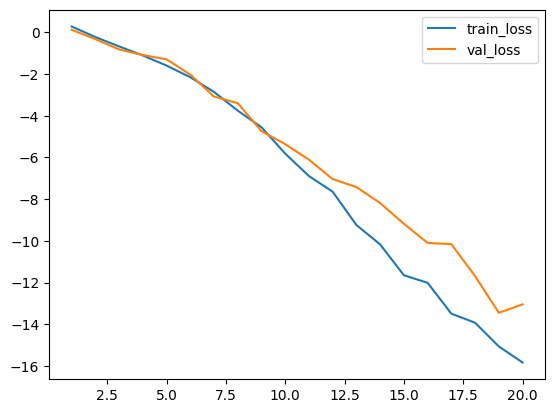

In [30]:
plt.plot(range(1,21),history.history["loss"],label="train_loss")
plt.plot(range(1,21),history.history["val_loss"],label="val_loss")
plt.legend()

9600/9600 [==============================] - 13s 1ms/step


<Axes: >

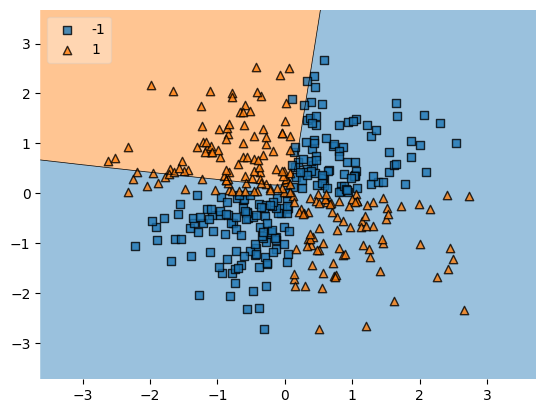

In [31]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

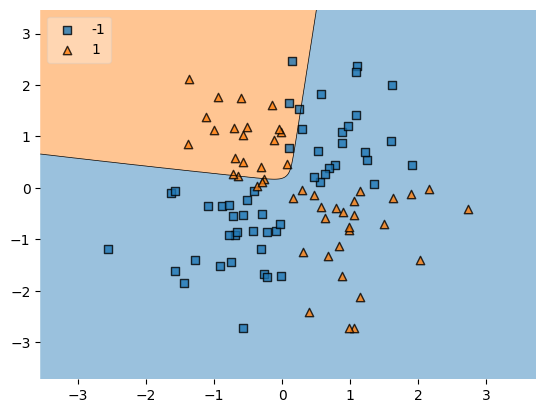

In [32]:
plot_decision_regions(x_test,y_test.values,clf=model,legend=2)